<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


In [8]:
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-23 01:30:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.8MB/s    in 3.1s    

2025-04-23 01:30:49 (49.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



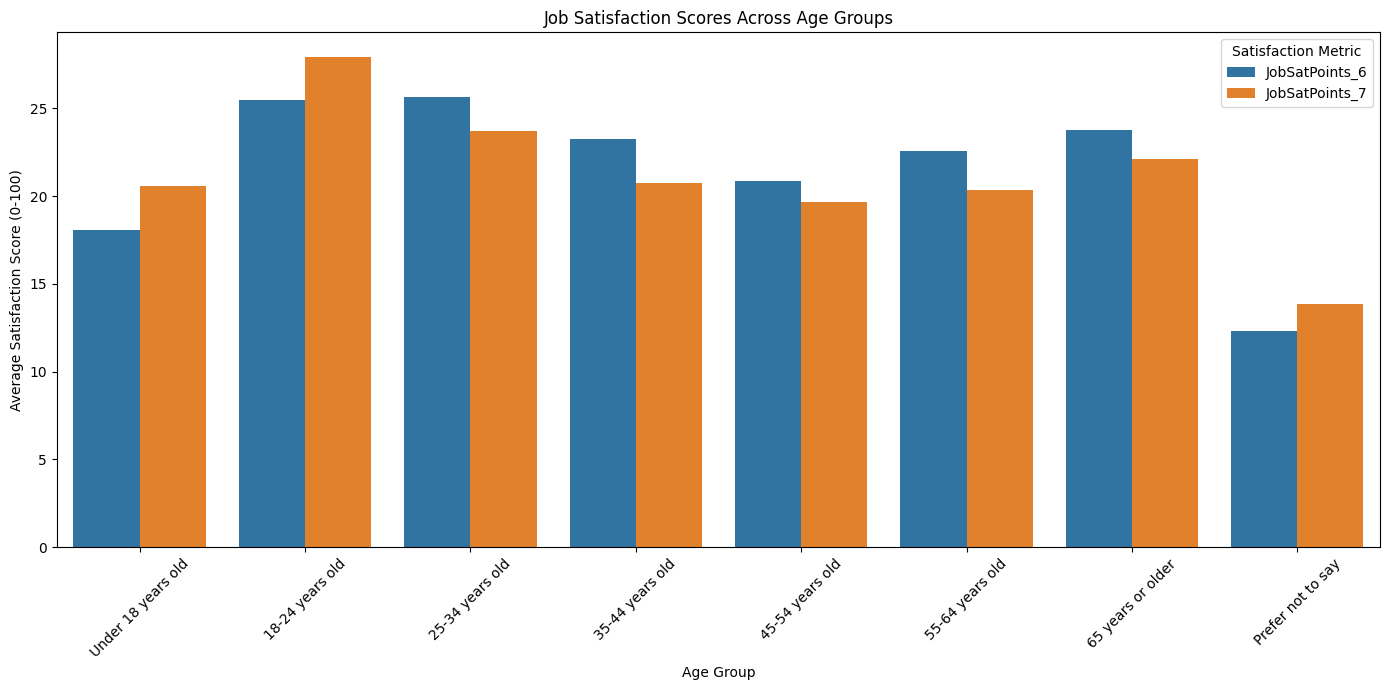

In [11]:
##Write your code here
# Step 1: Filter relevant columns and clean data
df_age_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Step 2: Convert age ranges to categorical with order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']
df_age_sat['Age'] = pd.Categorical(df_age_sat['Age'], categories=age_order, ordered=True)

# Step 3: Melt the satisfaction columns into a single long format
df_melted = df_age_sat.melt(id_vars='Age', 
                            value_vars=['JobSatPoints_6', 'JobSatPoints_7'], 
                            var_name='SatisfactionType', 
                            value_name='Score')

# Step 4: Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='Age', y='Score', hue='SatisfactionType', errorbar=None)
plt.title('Job Satisfaction Scores Across Age Groups')
plt.ylabel('Average Satisfaction Score (0-100)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Metric')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


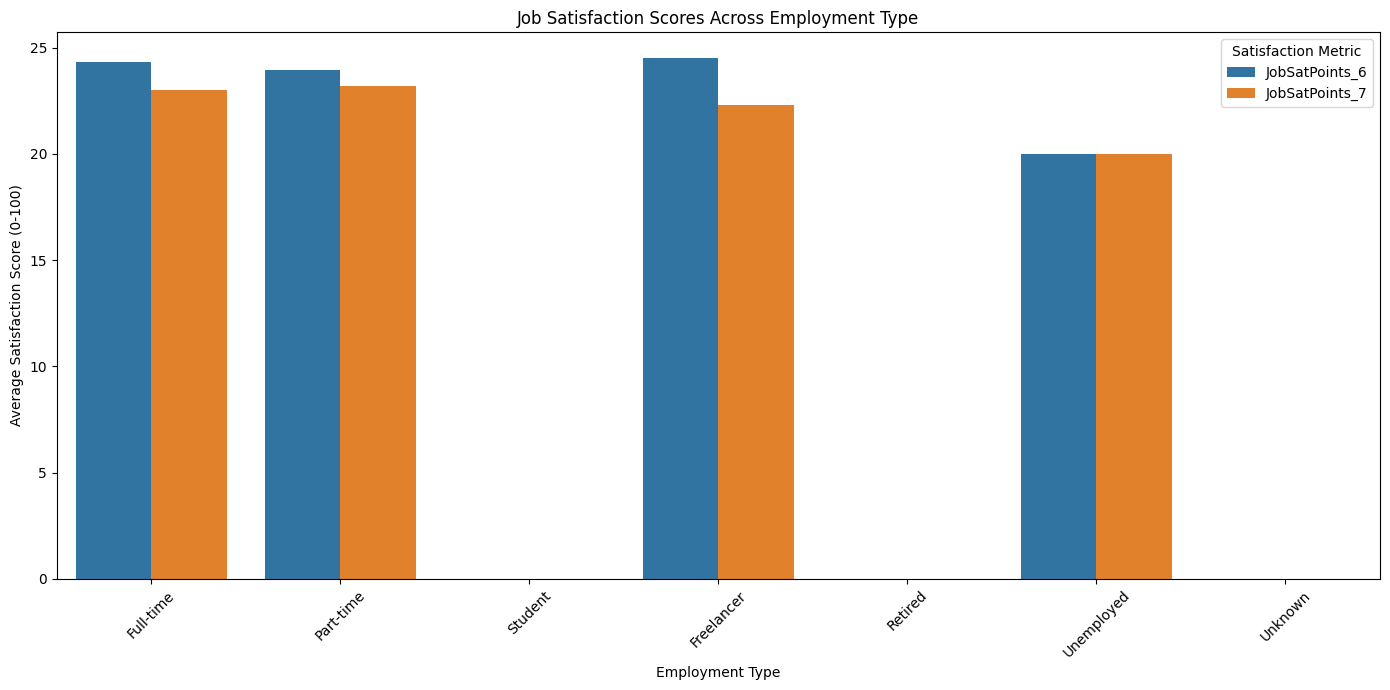

In [14]:
##Write your code here
def simplify_employment(emp):
    if pd.isnull(emp):
        return "Unknown"
    elif "full-time" in emp:
        return "Full-time"
    elif "part-time" in emp:
        return "Part-time"
    elif "Student" in emp:
        return "Student"
    elif "freelancer" in emp or "self-employed" in emp:
        return "Freelancer"
    elif "Retired" in emp:
        return "Retired"
    elif "Not employed" in emp:
        return "Unemployed"
    else:
        return "Other"

# Apply the function

df['EmploymentSimple'] = df['Employment'].apply(simplify_employment)

employment_order = ['Full-time', 'Part-time', 'Student',
             'Freelancer', 'Retired', 'Unemployed',
             'Unknown']
df['EmploymentSimple']= pd.Categorical(df['EmploymentSimple'], categories=employment_order, ordered=True)


df_Employment_sat = df[['EmploymentSimple', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

df_Employment_sat['EmploymentSimple'] = pd.Categorical(df_Employment_sat['EmploymentSimple'], categories=employment_order, ordered=True)

# Step 3: Melt the satisfaction columns into a single long format
df_melted = df_Employment_sat.melt(id_vars='EmploymentSimple', 
                            value_vars=['JobSatPoints_6', 'JobSatPoints_7'], 
                            var_name='SatisfactionType', 
                            value_name='Score')

# Step 4: Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='EmploymentSimple', y='Score', hue='SatisfactionType', errorbar=None)
plt.title('Job Satisfaction Scores Across Employment Type')
plt.ylabel('Average Satisfaction Score (0-100)')
plt.xlabel('Employment Type')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Metric')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


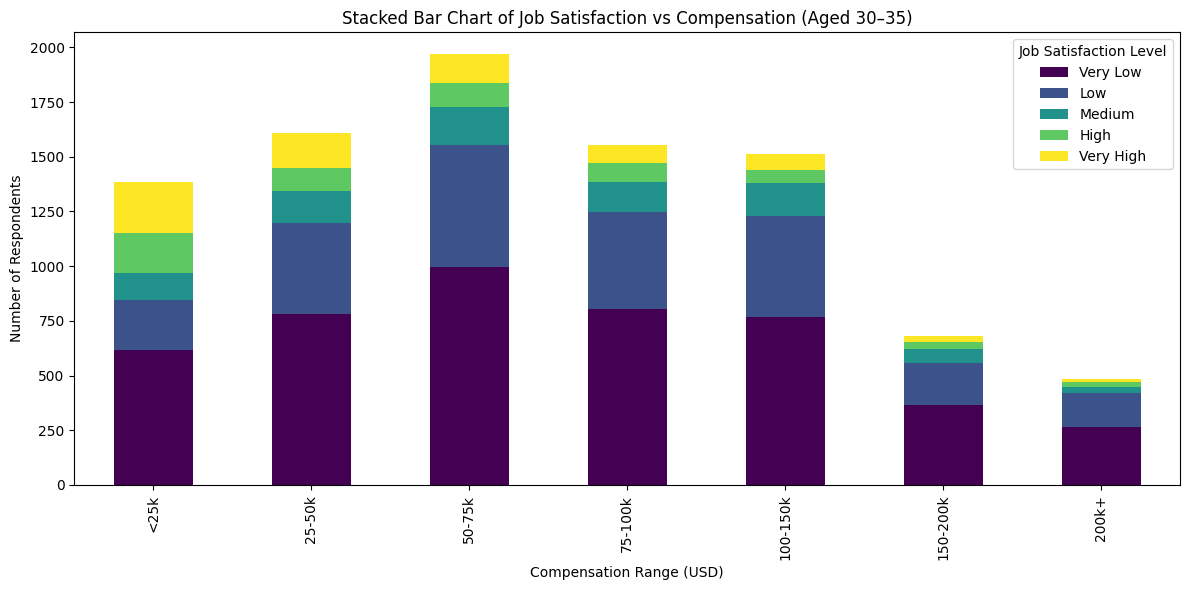

In [16]:
##Write your code here
df_filtered = df[
    (df['Age'] == '25-34 years old') | (df['Age'] == '35-44 years old')  # Approx age 30-35
].copy()

# Drop NA and ensure numeric
df_filtered = df_filtered[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')

# Optionally, bin compensation into ranges
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, df_filtered['ConvertedCompYearly'].max()]
labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-150k', '150-200k', '200k+']
df_filtered['CompRange'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=bins, labels=labels)

# Bin satisfaction score for grouping
df_filtered['SatisfactionLevel'] = pd.cut(df_filtered['JobSatPoints_6'], bins=[0, 20, 40, 60, 80, 100],
                                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create a pivot table for stacked bar
comp_sat_pivot = df_filtered.pivot_table(index='CompRange', columns='SatisfactionLevel', aggfunc='size', fill_value=0,observed=False)

# Plot stacked bar
comp_sat_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Stacked Bar Chart of Job Satisfaction vs Compensation (Aged 30–35)')
plt.xlabel('Compensation Range (USD)')
plt.ylabel('Number of Respondents')
plt.legend(title='Job Satisfaction Level')
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_2534/1147403515.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


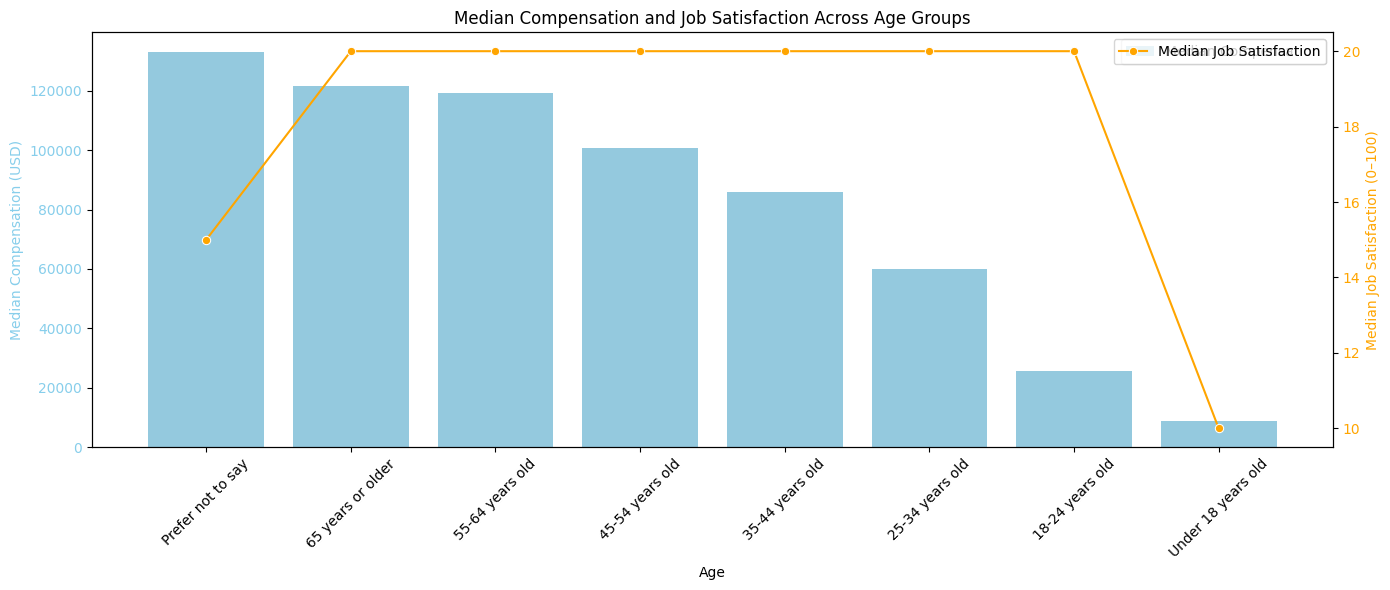

In [17]:
##Write your code here
df_age_comp_sat = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_age_comp_sat['ConvertedCompYearly'] = pd.to_numeric(df_age_comp_sat['ConvertedCompYearly'], errors='coerce')
df_age_comp_sat['JobSatPoints_6'] = pd.to_numeric(df_age_comp_sat['JobSatPoints_6'], errors='coerce')

# Group by age and calculate median compensation and job satisfaction
grouped = df_age_comp_sat.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index().sort_values(by='ConvertedCompYearly', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for median compensation
sns.barplot(data=grouped, x='Age', y='ConvertedCompYearly', ax=ax1, color='skyblue', label='Median Compensation')
ax1.set_ylabel('Median Compensation (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Line plot for job satisfaction on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=grouped, x='Age', y='JobSatPoints_6', ax=ax2, color='orange', marker='o', label='Median Job Satisfaction')
ax2.set_ylabel('Median Job Satisfaction (0–100)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
fig.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


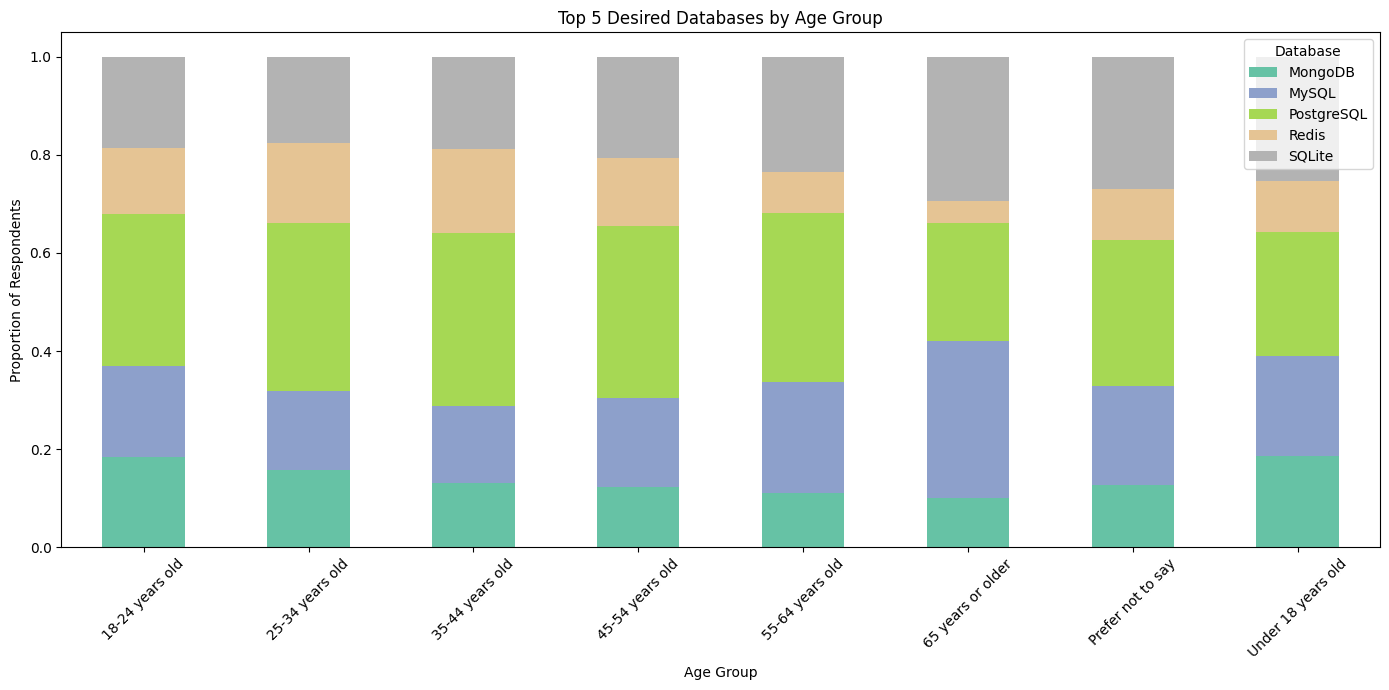

In [18]:
##Write your code here
# Extract relevant columns and drop missing values
df_db_age = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Explode comma-separated values into individual rows
df_db_age['DatabaseWantToWorkWith'] = df_db_age['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_db_age.explode('DatabaseWantToWorkWith')

# Count top 5 most desired databases overall
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index

# Filter only top databases
df_top = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_dbs)]

# Group by Age and Database, then count
db_counts = df_top.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Normalize to get proportions per age group
db_props = db_counts.div(db_counts.sum(axis=1), axis=0)

# Plot
db_props.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title('Top 5 Desired Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Database')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


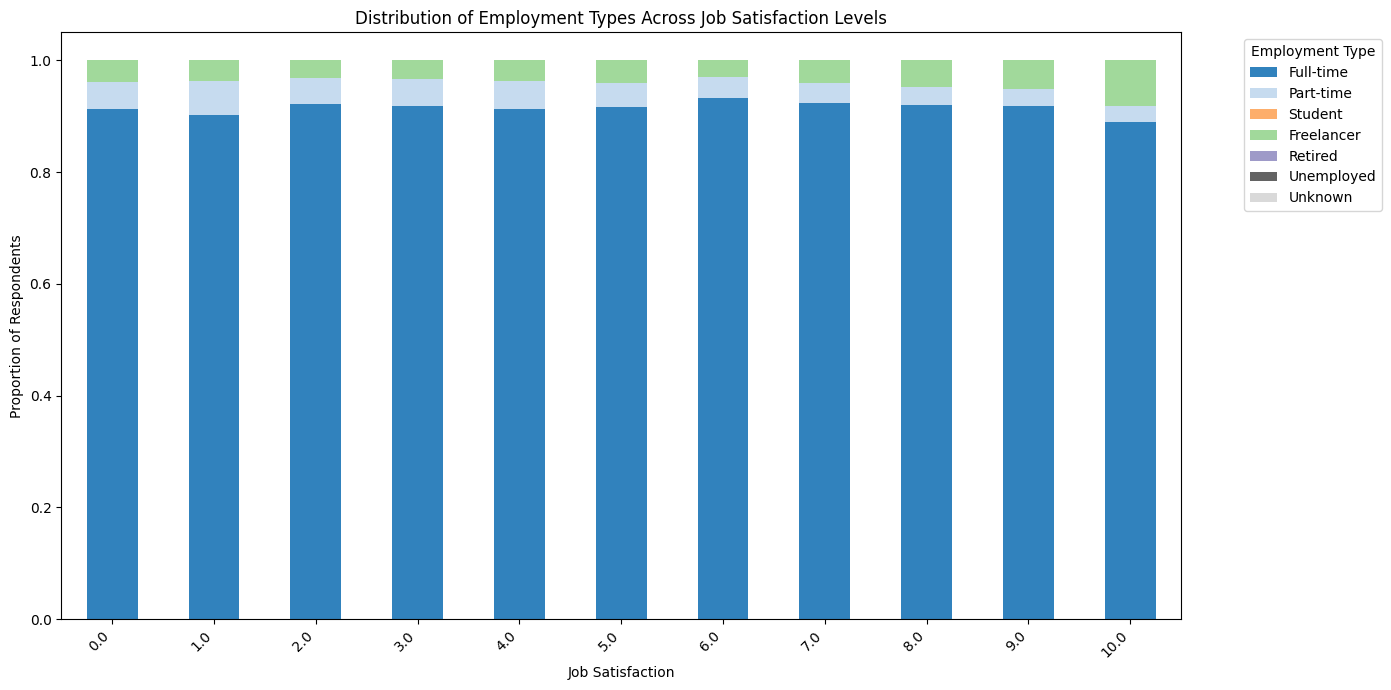

In [24]:
##Write your code here
def simplify_employment(emp):
    if pd.isnull(emp):
        return "Unknown"
    elif "full-time" in emp:
        return "Full-time"
    elif "part-time" in emp:
        return "Part-time"
    elif "Student" in emp:
        return "Student"
    elif "freelancer" in emp or "self-employed" in emp:
        return "Freelancer"
    elif "Retired" in emp:
        return "Retired"
    elif "Not employed" in emp:
        return "Unemployed"
    else:
        return "Other"

# Apply the function

df['EmploymentSimple'] = df['Employment'].apply(simplify_employment)

employment_order = ['Full-time', 'Part-time', 'Student',
             'Freelancer', 'Retired', 'Unemployed',
             'Unknown']
df['EmploymentSimple']= pd.Categorical(df['EmploymentSimple'], categories=employment_order, ordered=True)

df_emp_sat = df[['EmploymentSimple', 'JobSat']].dropna()

# Count Employment types within each JobSat group
job_sat_emp_counts = df_emp_sat.groupby(['JobSat', 'EmploymentSimple'],observed=False).size().unstack(fill_value=0)

# Optional: Normalize to get proportions
job_sat_emp_props = job_sat_emp_counts.div(job_sat_emp_counts.sum(axis=1), axis=0)

# Plot stacked bar chart
job_sat_emp_props.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20c')

plt.title('Distribution of Employment Types Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


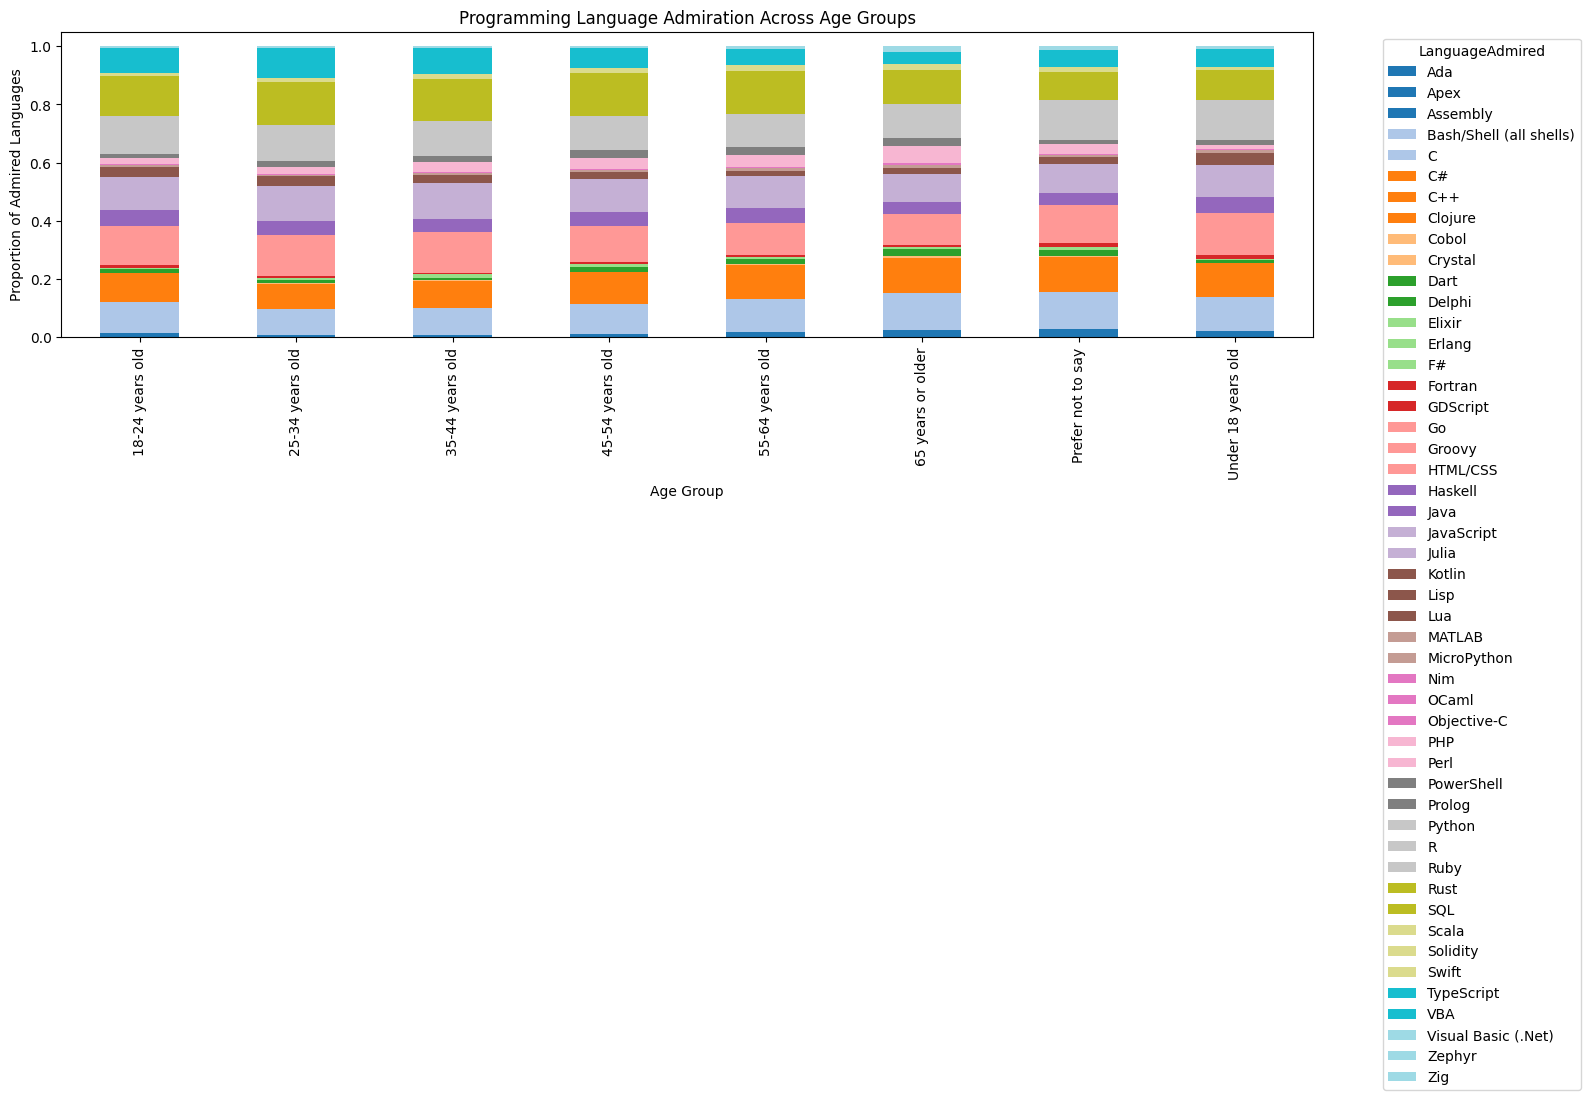

In [25]:
##Write your code here
df_lang_age = df[['Age', 'LanguageAdmired']].dropna()

# Explode LanguageAdmired column
df_lang_age['LanguageAdmired'] = df_lang_age['LanguageAdmired'].str.split(';')
df_lang_age = df_lang_age.explode('LanguageAdmired')

# Group by Age and LanguageAdmired, count occurrences
lang_by_age = df_lang_age.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')

# Pivot to get language admiration frequency across age groups
pivot_table = lang_by_age.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

# Optional: Normalize to get proportions
pivot_table_norm = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot: Stacked bar chart (or use pivot_table for raw counts)
pivot_table_norm.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

plt.title('Programming Language Admiration Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Admired Languages')
plt.legend(title='LanguageAdmired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_2534/165726536.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


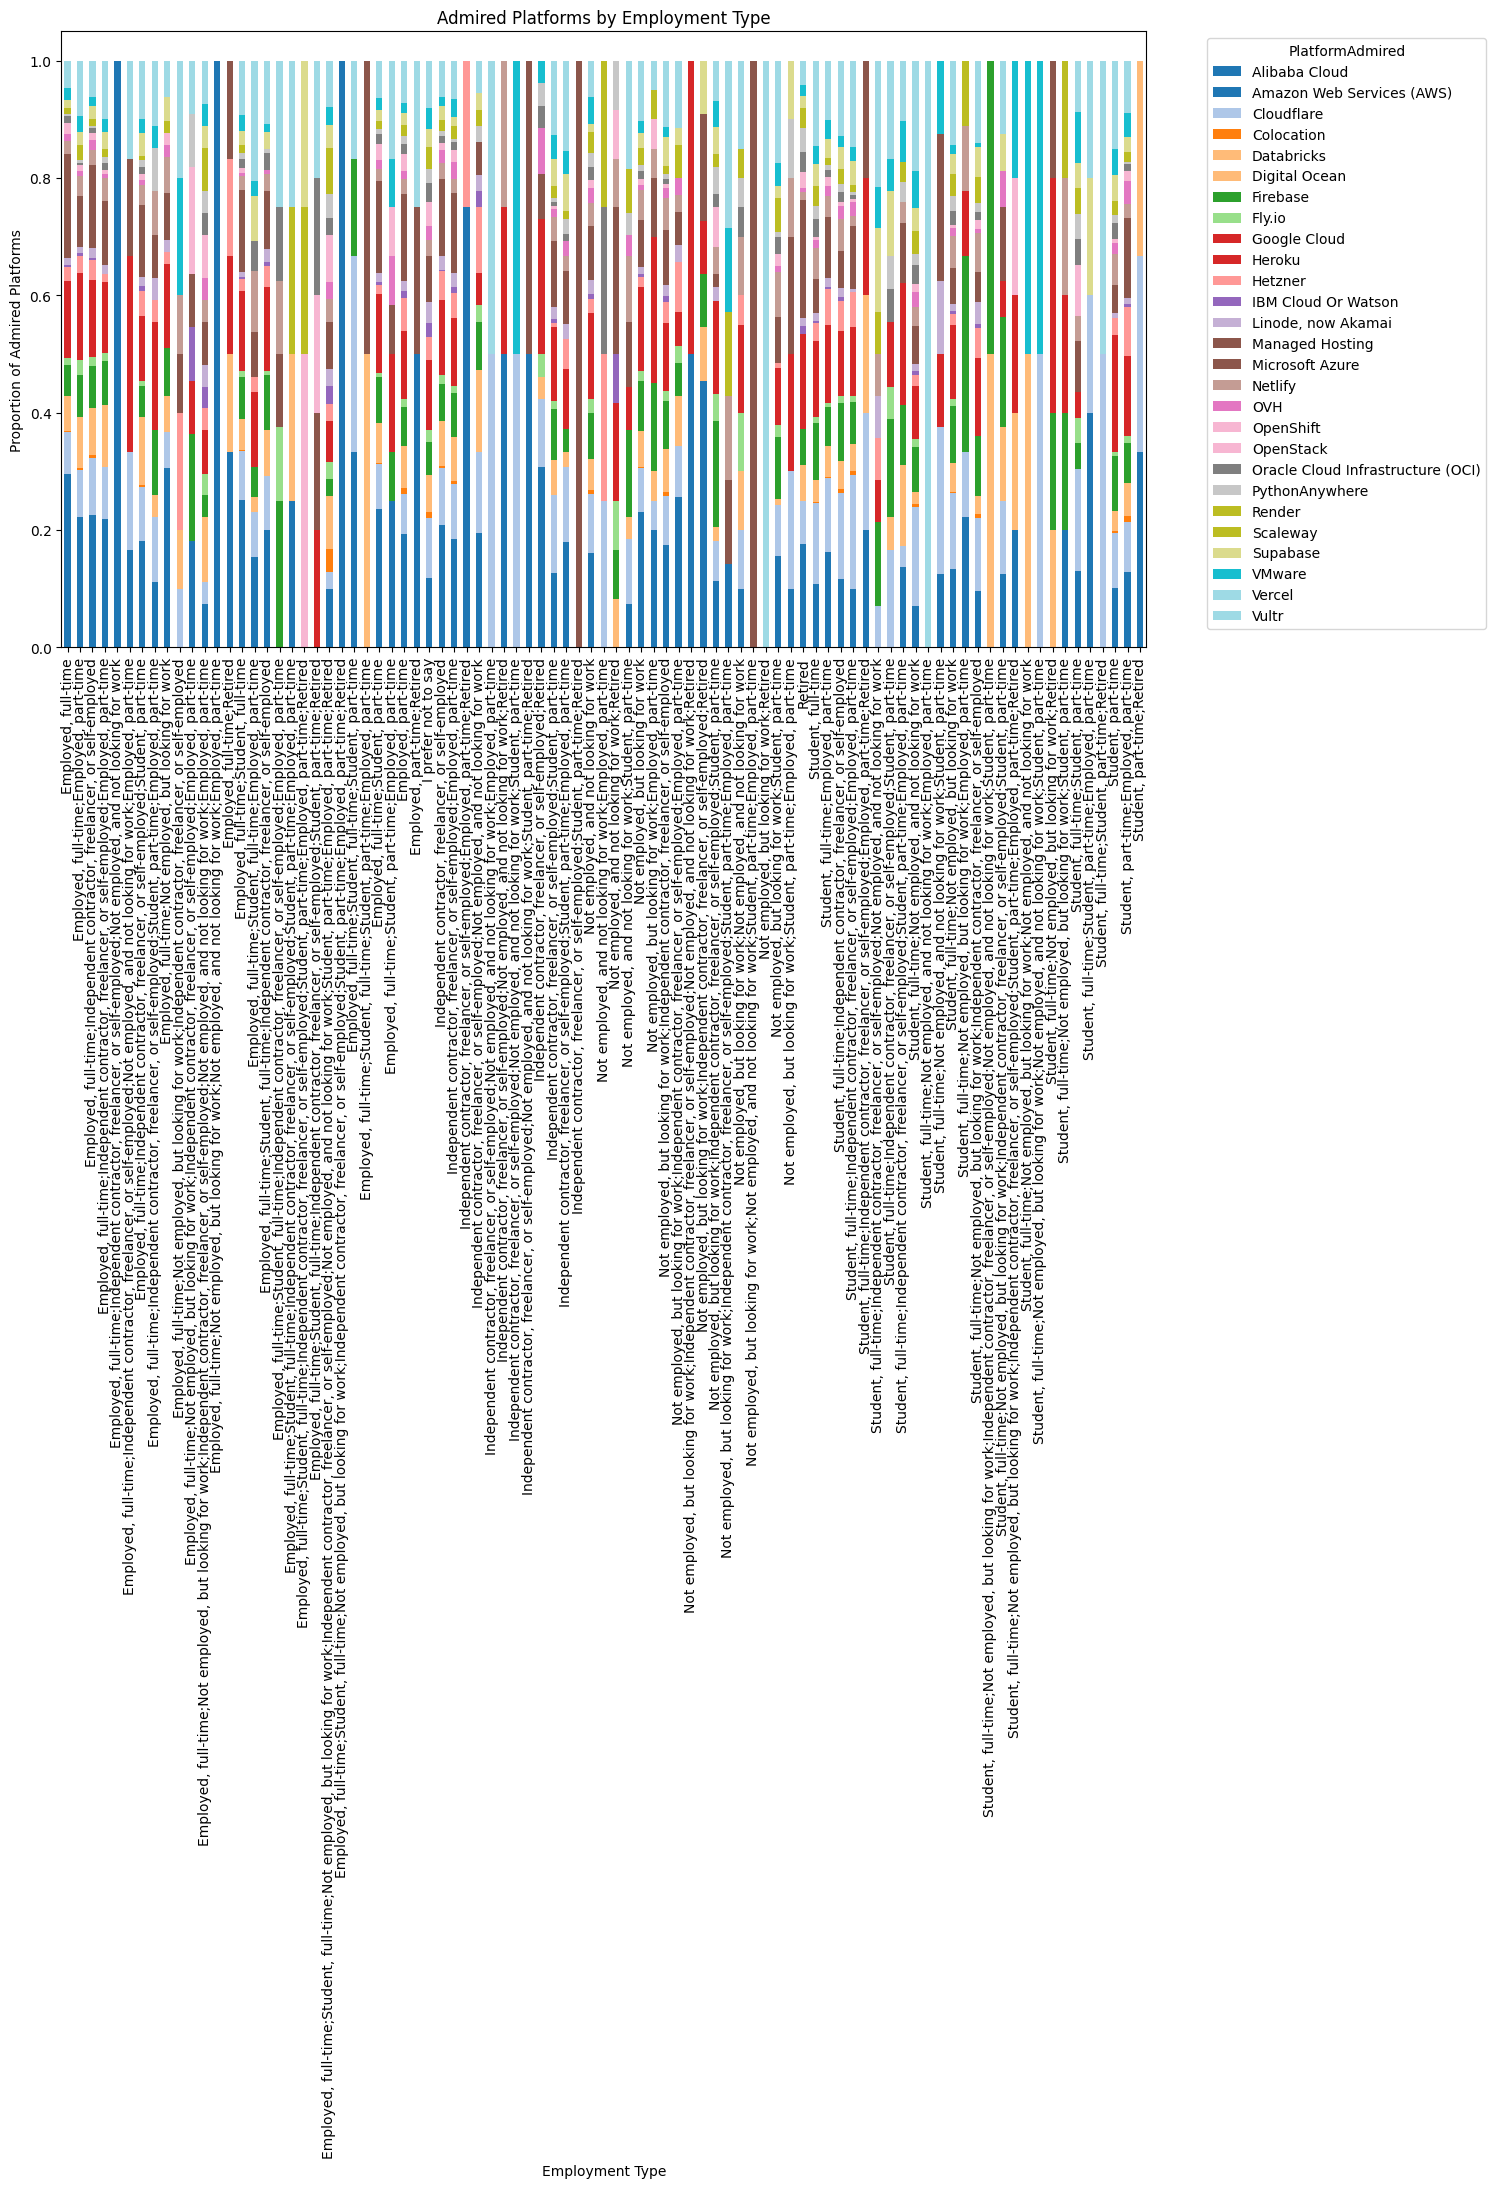

In [26]:
##Write your code here
df_platform = df[['Employment', 'PlatformAdmired']].dropna()
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')

# Group by Employment and PlatformAdmired
platform_counts = df_platform.groupby(['Employment', 'PlatformAdmired']).size().reset_index(name='Count')

# Pivot to prepare for plotting
pivot_table = platform_counts.pivot(index='Employment', columns='PlatformAdmired', values='Count').fillna(0)

# Optional: Normalize to show proportions
pivot_table_norm = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot stacked bar chart
pivot_table_norm.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Admired Platforms')
plt.legend(title='PlatformAdmired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
def simplify_employment(emp):
    if pd.isnull(emp):
        return "Unknown"
    elif "full-time" in emp:
        return "Full-time"
    elif "part-time" in emp:
        return "Part-time"
    elif "Student" in emp:
        return "Student"
    elif "freelancer" in emp or "self-employed" in emp:
        return "Freelancer"
    elif "Retired" in emp:
        return "Retired"
    elif "Not employed" in emp:
        return "Unemployed"
    else:
        return "Other"

# Apply the function

df['EmploymentSimple'] = df['Employment'].apply(simplify_employment)

employment_order = ['Full-time', 'Part-time', 'Student',
             'Freelancer', 'Retired', 'Unemployed',
             'Unknown']
df['EmploymentSimple']= pd.Categorical(df['EmploymentSimple'], categories=employment_order, ordered=True)



df_platform = df[['EmploymentSimple', 'PlatformAdmired']].dropna()
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')

# Group by Employment and PlatformAdmired
platform_counts = df_platform.groupby(['EmploymentSimple', 'PlatformAdmired']).size().reset_index(name='Count')

# Pivot to prepare for plotting
pivot_table = platform_counts.pivot(index='EmploymentSimple', columns='PlatformAdmired', values='Count').fillna(0)

# Optional: Normalize to show proportions
pivot_table_norm = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot stacked bar chart
pivot_table_norm.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Admired Platforms')
plt.legend(title='PlatformAdmired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
